In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
data = load_boston()

c:\Users\Haadif\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [2]:
labels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housePricePrediction.csv')
df.dropna(axis=1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
len(train), len(valid), len(test)

(303, 101, 102)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)
model.coef_,model.intercept_

(array([-1.09991855e-01,  3.14881417e-02, -1.27399607e-02,  2.78732092e+00,
        -1.76593836e+01,  5.02474756e+00, -1.54991343e-02, -1.35082773e+00,
         3.08002569e-01, -1.40069932e-02, -9.67584714e-01,  5.97874791e-03,
        -3.37287377e-01]),
 29.59903570291705)

In [7]:
y_pred = model.predict(X_valid)
r2_score(y_valid,y_pred)

0.7061715053391058

In [8]:
y_pred1 = model.predict(X_test)
r2_score(y_test,y_pred1)

0.5817723176438533

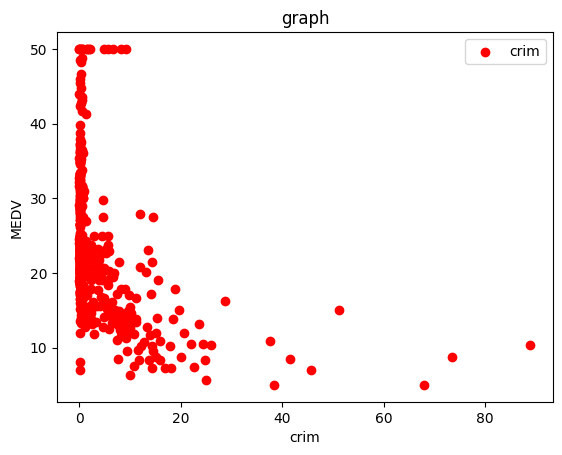

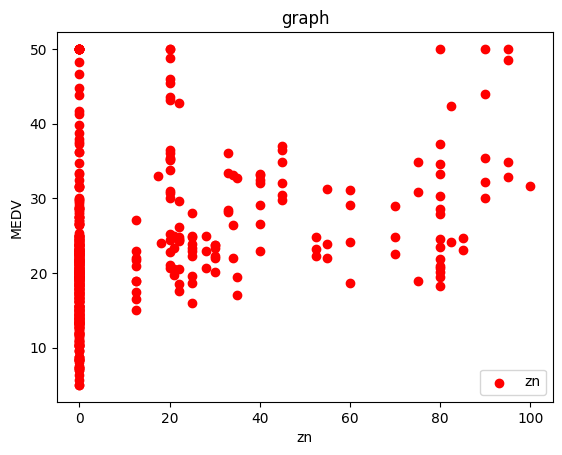

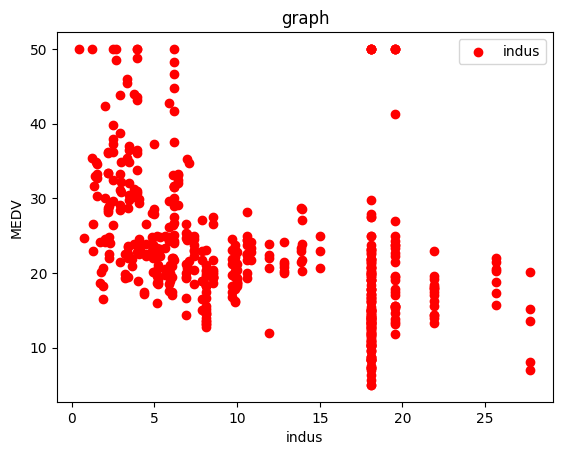

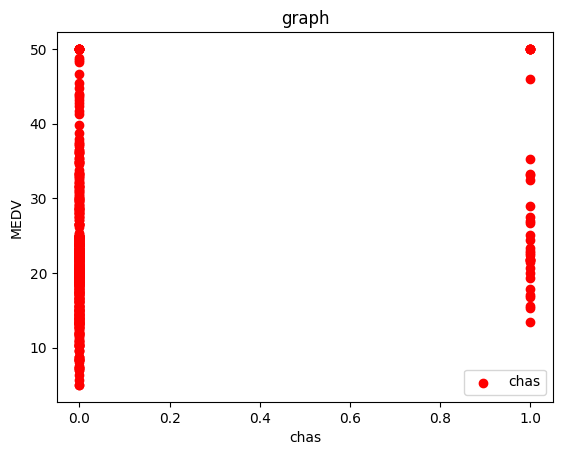

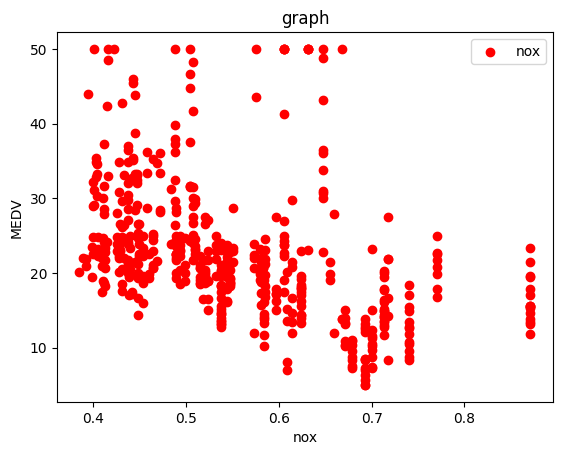

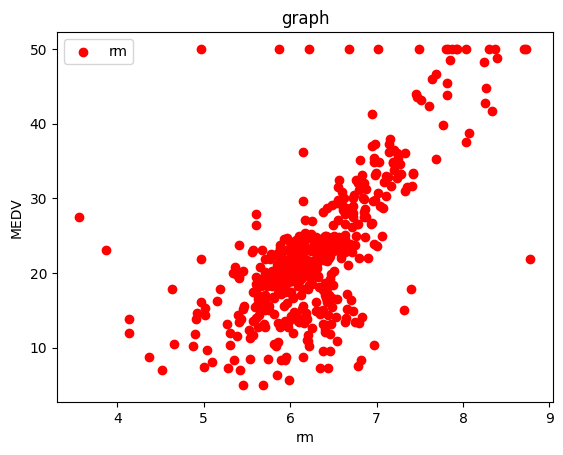

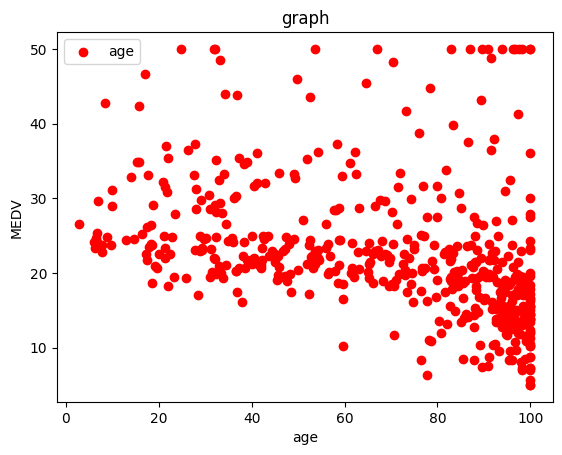

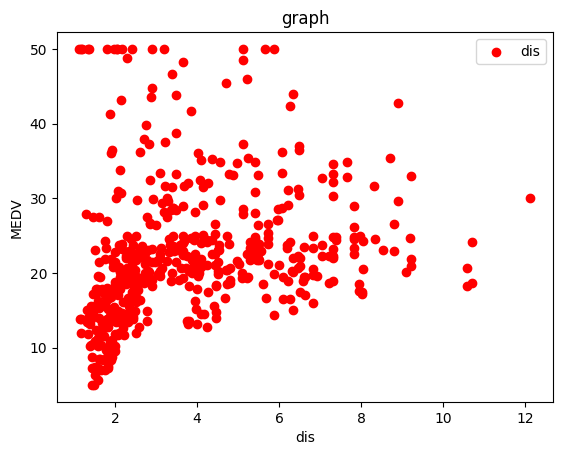

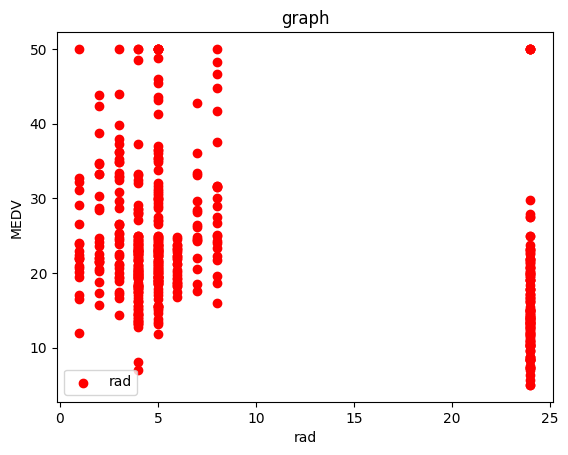

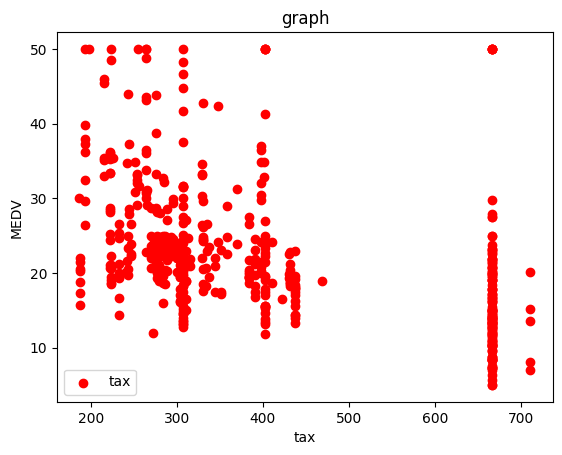

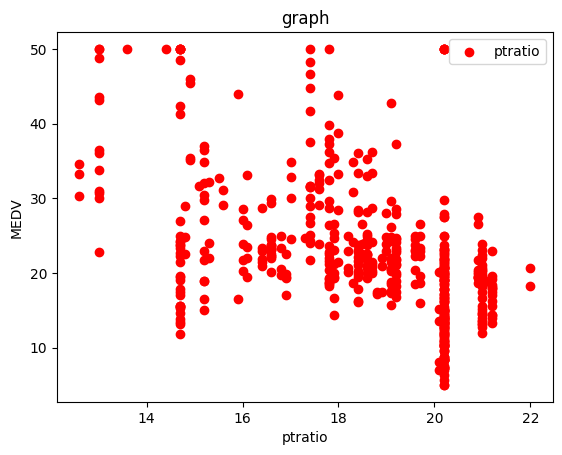

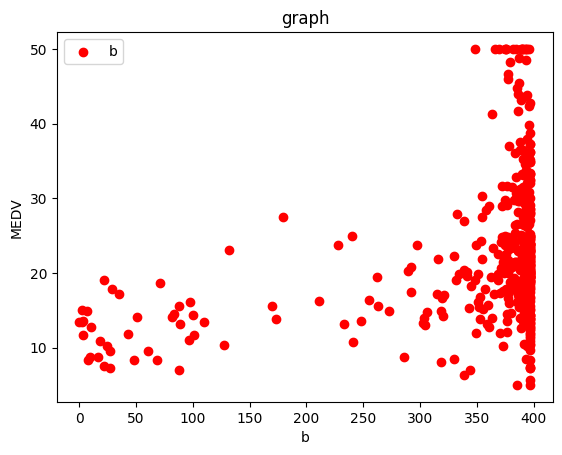

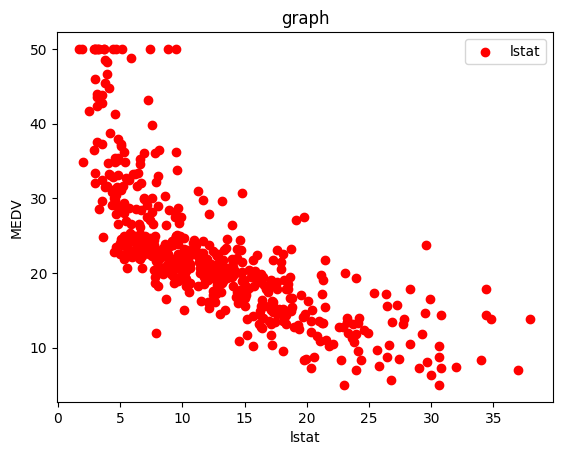

In [9]:
import matplotlib.pyplot as plt
y = df.medv.values
for i in range(len(df.columns)-1):
    x = df[df.columns[i]].values
    plt.scatter(x,y, label= df.columns[i],color='red')
    plt.legend()
    plt.xlabel(df.columns[i])
    plt.ylabel('MEDV')
    plt.title('graph')
    plt.show()

    

### CART and Random Forest

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [14]:
cart_model = DecisionTreeRegressor(criterion="squared_error", max_depth=3, min_samples_split=20)

In [24]:
ftd_model = cart_model.fit(X_train, y_train)

In [27]:
y_pred1 = ftd_model.predict(X_train)
mean_squared_error(y_pred,y_valid)
y_pred1

array([17.82407407, 17.82407407, 11.83469388, 21.78898305, 21.78898305,
       17.82407407, 17.82407407, 21.78898305, 27.66857143, 21.78898305,
       21.78898305, 17.82407407, 27.66857143, 21.78898305, 21.78898305,
       21.78898305, 21.78898305, 17.82407407, 17.82407407, 21.78898305,
       17.82407407, 17.82407407, 21.78898305, 17.82407407, 17.82407407,
       11.83469388, 17.82407407, 33.81428571, 27.66857143, 11.83469388,
       17.82407407, 21.78898305, 17.82407407, 11.83469388, 21.78898305,
       27.66857143, 11.83469388, 21.78898305, 11.83469388, 21.78898305,
       21.78898305, 21.78898305, 11.83469388, 33.81428571, 21.78898305,
       11.83469388, 27.66857143, 27.66857143, 21.78898305, 27.66857143,
       21.78898305, 21.78898305, 17.82407407, 21.78898305, 33.81428571,
       27.66857143, 16.4       , 21.78898305, 17.82407407, 11.83469388,
       21.78898305, 21.78898305, 21.78898305, 33.81428571, 46.68823529,
       17.82407407, 21.78898305, 17.82407407, 21.78898305, 27.66

In [26]:
mean_squared_error(ftd_model.predict(X_test),y_test)

29.620901569498063

In [37]:
model_rf = RandomForestRegressor(criterion='squared_error', max_depth= 3,min_samples_split= 20,n_estimators=10)
ftd_model_rf = model_rf.fit(X_train,y_train)

In [38]:
y_pred_rf = ftd_model_rf.predict(X_valid)
mean_squared_error(y_pred_rf,y_valid)

26.953508380941724

In [40]:
model_rf.estimators_[1]

DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_split=20,
                      random_state=698452567)

In [41]:
from sklearn.tree import plot_tree

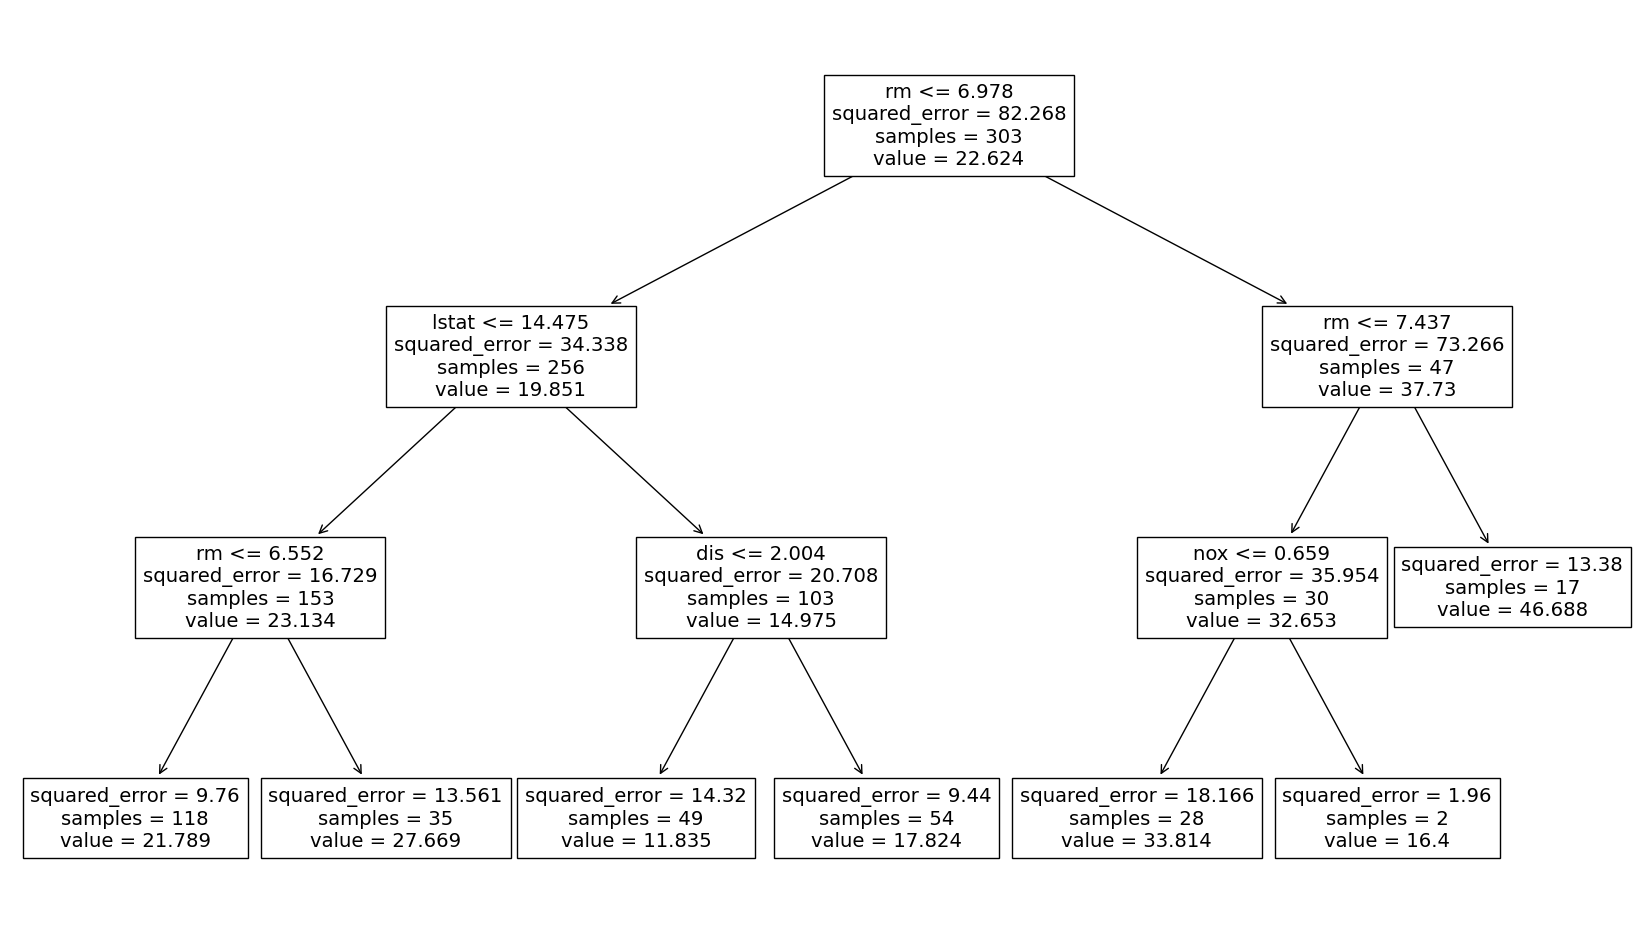

In [47]:
plt.figure(figsize=(21,12))
plot_tree(cart_model,feature_names=train.columns[:-1])
plt.show()